#**MANUFACTURE DEFECTS**

##**Data Source**

This data was published on Kaggle and contains simulated data related to manufacturing defects observed during quality control processes.

It includes information such as defect type, detection date, location within the product, severity level, inspection method used, and repair costs.

This dataset can be used for analyzing defect patterns, improving quality control processes, and assessing the impact of defects on product quality and production costs.

Structure:

- **defect_id**: Unique identifier for each defect.

- **product_id**: Identifier for the product associated with the defect.

- **defect_type**: Type or category of the defect (e.g., cosmetic, functional, structural).

- **defect_description**: Description of the defect.

- **defect_date**: Date when the defect was detected.

- **defect_location**: Location within the product where the defect was found (e.g., surface, component).
- **severity**: Severity level of the defect (e.g., minor, moderate, critical).

- **inspection_method**: Method used to detect the defect (e.g., visual inspection, automated testing).

- **repair_action**: Action taken to repair or address the defect.

- **repair_cost**: Cost incurred to repair the defect (in local currency).

##**Load Data**

In [ ]:
# import library:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Getting data id on google docs

defect_data='1ivKij1HC8xH_ck-UB2JuGgJlE74WjctAu8ltFskk11k'


In [ ]:
# get data path:

url='https://docs.google.com/spreadsheets/d/' + defect_data + '/export?format=xlsx'
url

'https://docs.google.com/spreadsheets/d/1ivKij1HC8xH_ck-UB2JuGgJlE74WjctAu8ltFskk11k/export?format=xlsx'

In [ ]:
# Load data

df_defect=pd.read_excel(url)

In [ ]:
# check data loaded

df_defect.head()


,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64


##**Data Cleaning**

###**Checking structure of dataset**

In [ ]:
# Review data structure

df_defect.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   defect_id          1000 non-null   int64         
 1   product_id         1000 non-null   int64         
 2   defect_type        1000 non-null   object        
 3   defect_date        1000 non-null   datetime64[ns]
 4   defect_location    1000 non-null   object        
 5   severity           1000 non-null   object        
 6   inspection_method  1000 non-null   object        
 7   repair_cost        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 62.6+ KB


###**Number of Missing values & Duplicate Rows**

In [ ]:
# checking data missing

df_defect.isna().sum()


,0
defect_id,0
product_id,0
defect_type,0
defect_date,0
defect_location,0
severity,0
inspection_method,0
repair_cost,0


In [ ]:
# cheking data is duplicated

df_defect.duplicated().sum()


0

In [ ]:
# checking data is null:

df_defect.isnull().sum()

,0
defect_id,0
product_id,0
defect_type,0
defect_date,0
defect_location,0
severity,0
inspection_method,0
repair_cost,0


In [ ]:
# checking data is unique:

df_defect.nunique()

,0
defect_id,1000
product_id,100
defect_type,3
defect_date,182
defect_location,3
severity,3
inspection_method,3
repair_cost,996


###**Checking consistency of data**

In [ ]:
# checking "objected" columns is unique

for col in ['defect_type', 'defect_location', 'severity', 'inspection_method']:
  print(f"column: '{col}': {df_defect[col].unique()}")


column: 'defect_type': ['Structural' 'Functional' 'Cosmetic']
column: 'defect_location': ['Component' 'Internal' 'Surface']
column: 'severity': ['Minor' 'Critical' 'Moderate']
column: 'inspection_method': ['Visual Inspection' 'Automated Testing' 'Manual Testing']


In [ ]:
# change format of defect_date to yyyy-mm-dd

df_defect['defect_date']=pd.to_datetime(df_defect['defect_date'])


In [ ]:
df_defect.head()


,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost,month
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47,2024-06
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87,2024-04
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81,2024-02
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47,2024-03
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64,2024-04


In [ ]:
# add new column "month" to database for further used:

df_defect['month']=df_defect['defect_date'].dt.strftime('%Y-%m')
df_defect.head()


,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost,month
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47,2024-06
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87,2024-04
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81,2024-02
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47,2024-03
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64,2024-04


In [ ]:
# change dtype of columns:

df_defect[['defect_type','defect_location','severity','inspection_method']] = df_defect[['defect_type','defect_location','severity','inspection_method']].astype('category')
df_defect.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   defect_id          1000 non-null   int64         
 1   product_id         1000 non-null   int64         
 2   defect_type        1000 non-null   category      
 3   defect_date        1000 non-null   datetime64[ns]
 4   defect_location    1000 non-null   category      
 5   severity           1000 non-null   category      
 6   inspection_method  1000 non-null   category      
 7   repair_cost        1000 non-null   float64       
 8   month              1000 non-null   object        
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 43.6+ KB


###**Summary Statistics**

Show a descriptive statistics of the numeric columns

In [ ]:
df_defect[['defect_id','product_id','repair_cost']].describe()


,defect_id,product_id,repair_cost
count,1000.000000,1000.000000,1000.000000
mean,500.500000,50.837000,507.627150
std,288.819436,29.480935,289.623615
min,1.000000,1.000000,10.220000
25%,250.750000,26.000000,270.902500
50%,500.500000,51.000000,506.430000
75%,750.250000,77.000000,759.065000
max,1000.000000,100.000000,999.640000


Show a descriptive statistics of the non-numeric columns

In [ ]:
df_defect[['defect_type', 'defect_location', 'severity', 'inspection_method']].describe()

,defect_type,defect_location,severity,inspection_method
count,1000,1000,1000,1000
unique,3,3,3,3
top,Structural,Surface,Minor,Manual Testing
freq,352,353,358,352


##**Exploratory Data Analysis**

###**Monthly Defects Occurred**

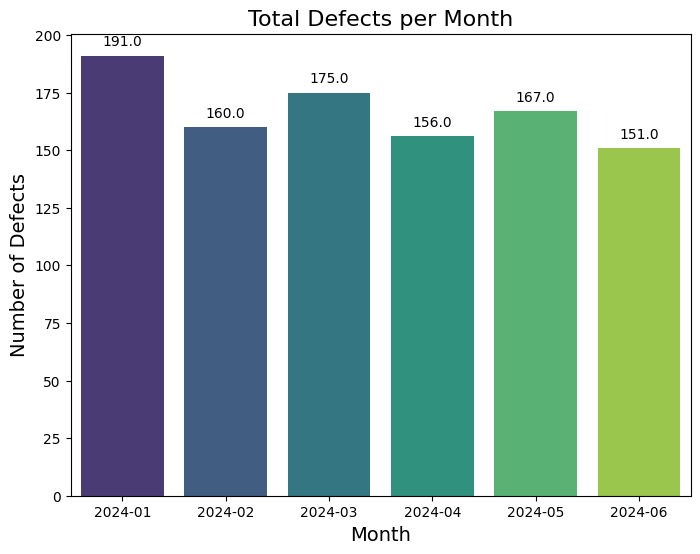

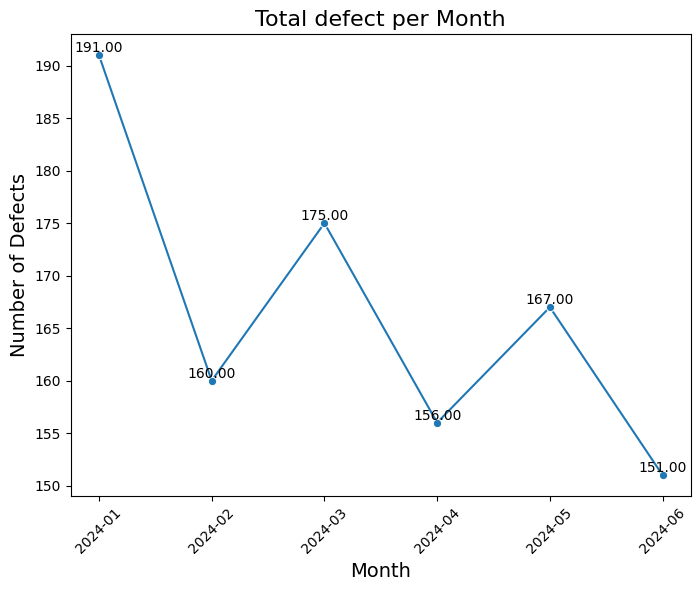

In [ ]:
# prompt: create column chart to show total defect of each month, order by month, showing data label for each column

# Group by month and count the number of defects
defect_count_by_month = df_defect.groupby('month')['defect_id'].count().reset_index()

# Sort the data by month
defect_count_by_month = defect_count_by_month.sort_values('month')

# Create the bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='month', y='defect_id',hue='month', legend=False, data=defect_count_by_month, palette='viridis')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set chart title and labels
plt.title('Total Defects per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Defects', fontsize=14)

# Create the line chart
plt.figure(figsize=(8, 6))
ax = sns.lineplot(x='month', y='defect_id', data=defect_count_by_month, marker='o')

# Add data labels to the points

for x, y in zip(defect_count_by_month['month'], defect_count_by_month['defect_id']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Set chart title and labels
plt.title('Total defect per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Defects', fontsize=14)


plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

###**Monthly Repair cost**

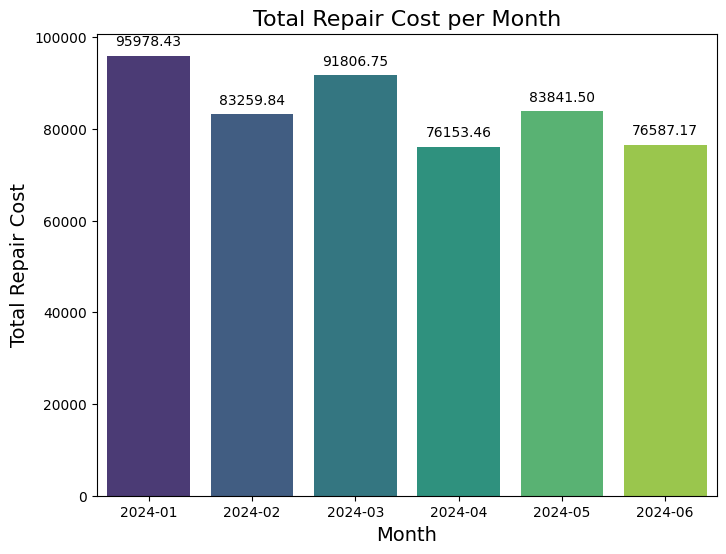

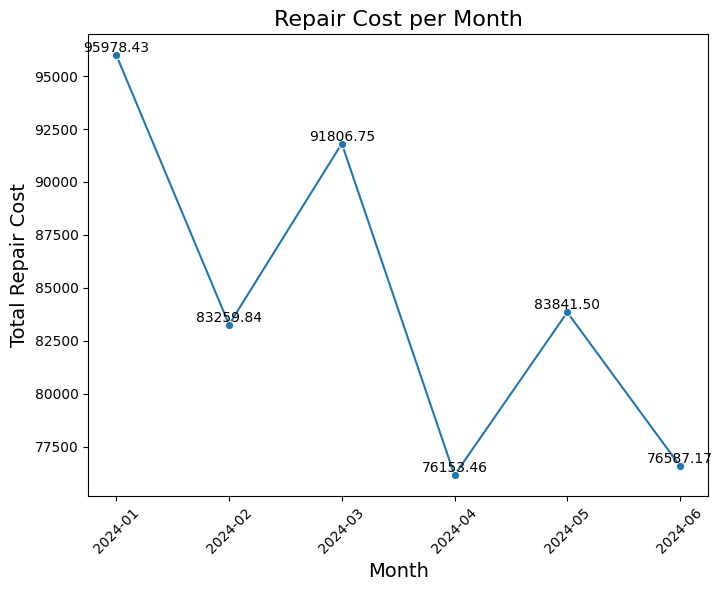

In [ ]:
# Group by month and sum the repair cost
repair_cost_by_month = df_defect.groupby('month')['repair_cost'].sum().reset_index()

# Sort the data by month
repair_cost_by_month = repair_cost_by_month.sort_values('month')

# Create the bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='month', y='repair_cost', hue='month', legend=False, data=repair_cost_by_month, palette='viridis')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set chart title and labels
plt.title('Total Repair Cost per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Repair Cost', fontsize=14)

# Create the line chart
plt.figure(figsize=(8, 6))
ax = sns.lineplot(x='month', y='repair_cost', data=repair_cost_by_month, marker='o')

# Add data labels to the points

for x, y in zip(repair_cost_by_month['month'], repair_cost_by_month['repair_cost']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Set chart title and labels
plt.title('Repair Cost per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Repair Cost', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

###**Inspection Method, Type, location and Severity Level of Defects**


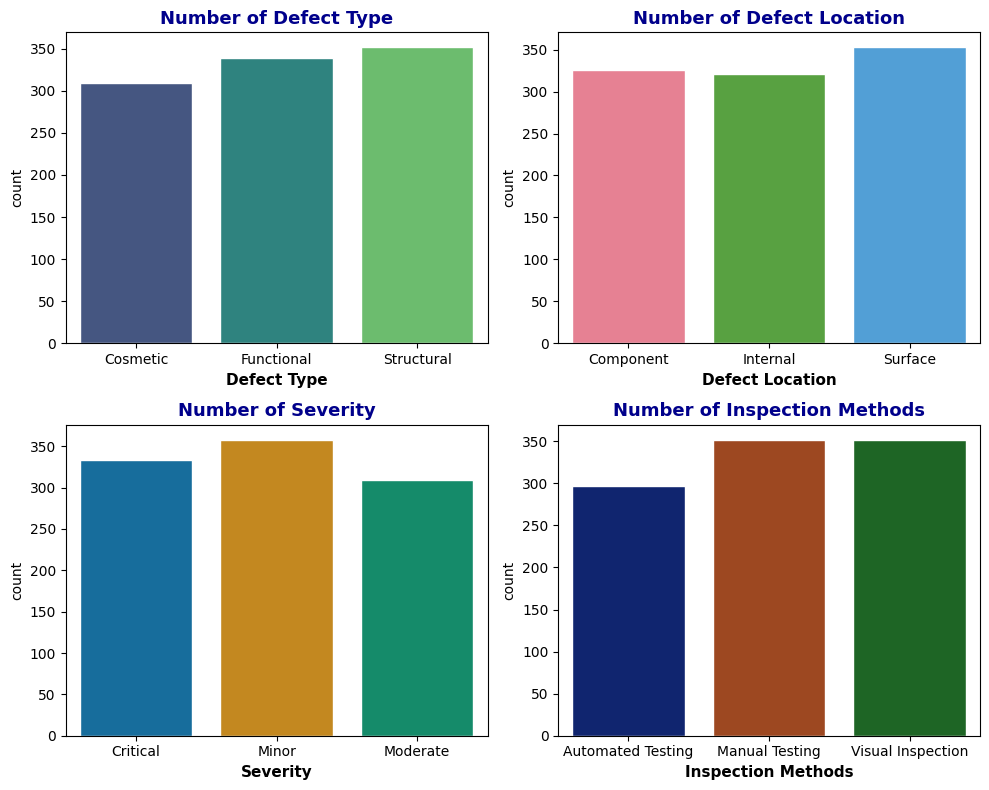

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
sns.set_style('darkgrid')

# Inspection Method
sns.countplot(x=df_defect['inspection_method'], hue=df_defect['inspection_method'], legend=False, palette='dark', ax=axs[1,1])

axs[1, 1].set_title('Number of Inspection Methods', fontsize = 13, fontweight = 'bold', color = 'darkblue')
axs[1, 1].set_xlabel('Inspection Methods',fontsize = 11, fontweight = 'bold')

# Defect Type
sns.countplot(x=df_defect['defect_type'], hue=df_defect['defect_type'], legend=False, palette='viridis', ax=axs[0,0])
axs[0, 0].set_title('Number of Defect Type', fontsize = 13, fontweight = 'bold', color = 'darkblue')
axs[0, 0].set_xlabel('Defect Type',fontsize = 11, fontweight = 'bold')

# Defect Location
sns.countplot(x=df_defect['defect_location'],hue=df_defect['defect_location'], legend=False, palette='husl', ax=axs[0,1])
axs[0, 1].set_title('Number of Defect Location', fontsize = 13, fontweight = 'bold', color = 'darkblue')
axs[0, 1].set_xlabel('Defect Location',fontsize = 11, fontweight = 'bold')

# Severity
sns.countplot(x=df_defect['severity'], hue=df_defect['severity'], legend=False, palette='colorblind', ax=axs[1,0])
axs[1, 0].set_title('Number of Severity', fontsize = 13, fontweight = 'bold', color = 'darkblue')
axs[1, 0].set_xlabel('Severity',fontsize = 11, fontweight = 'bold')

plt.tight_layout()


###**Relation between defect_type, defect_location, severity level and inspection method**


In [ ]:
categ_cols = ['defect_type', 'defect_location', 'severity', 'inspection_method']


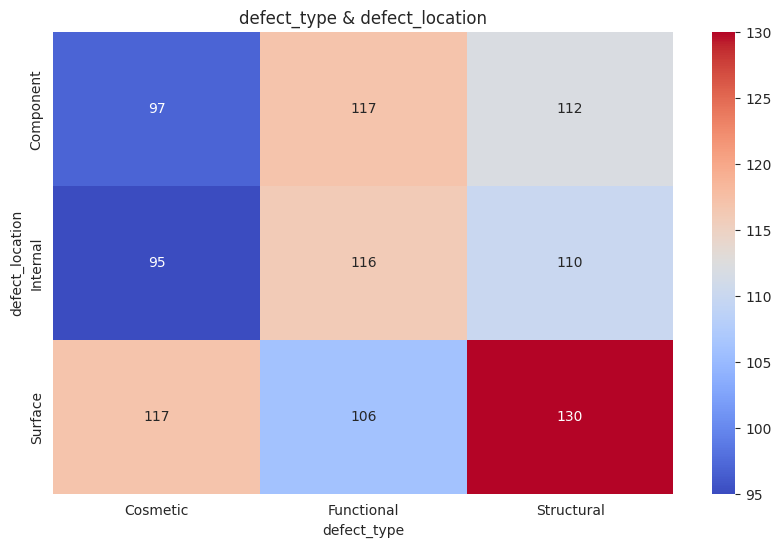

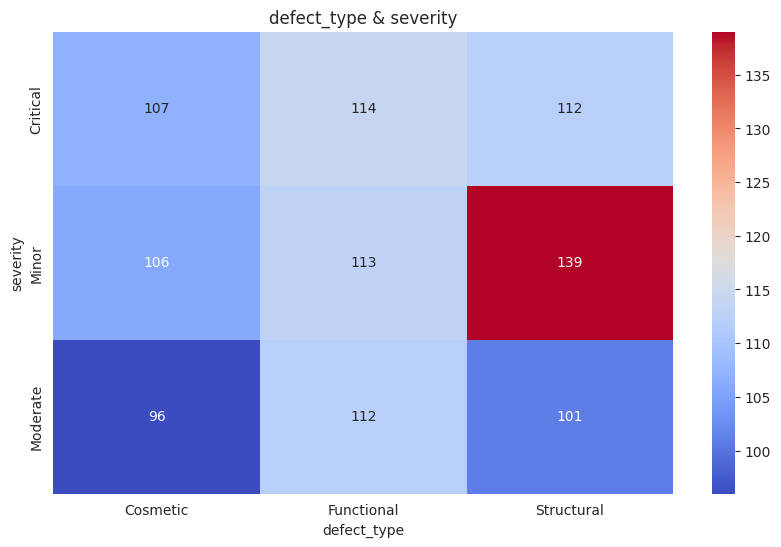

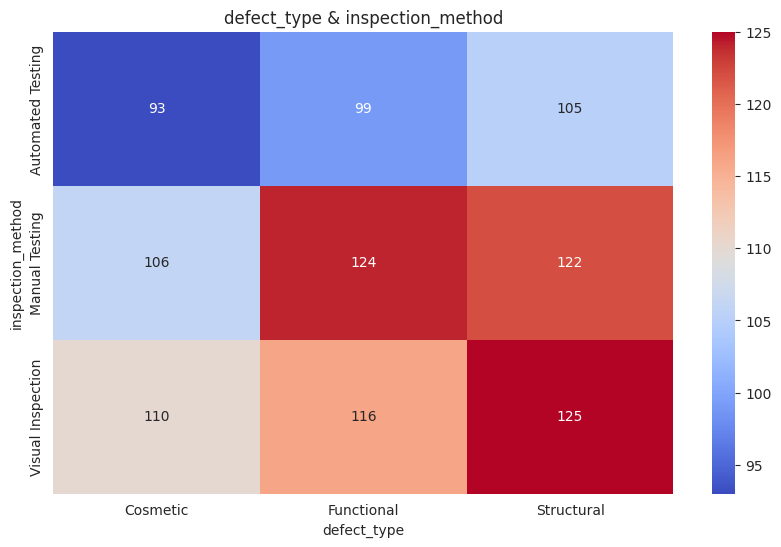

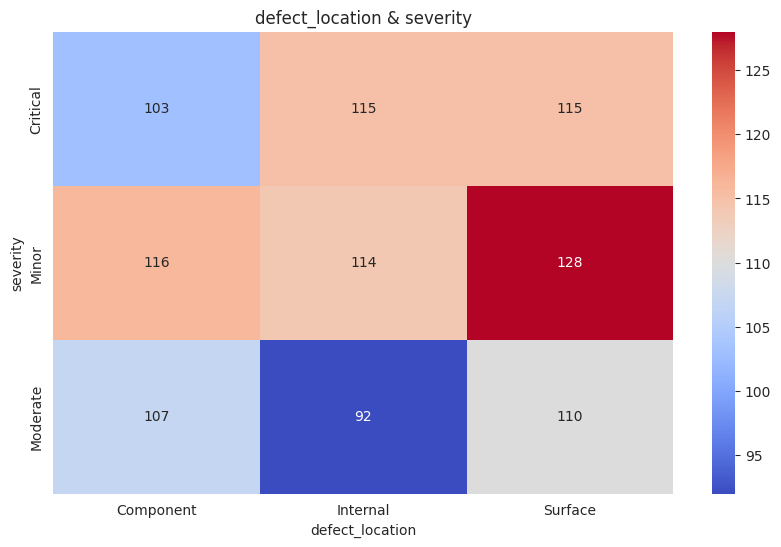

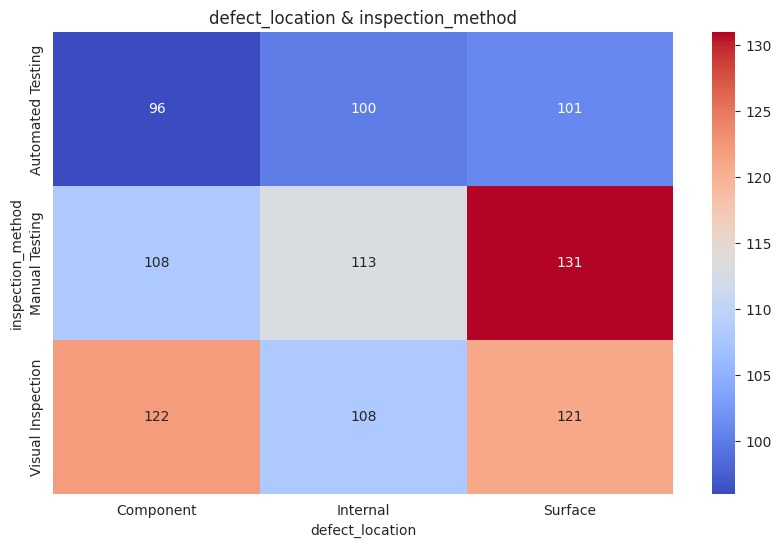

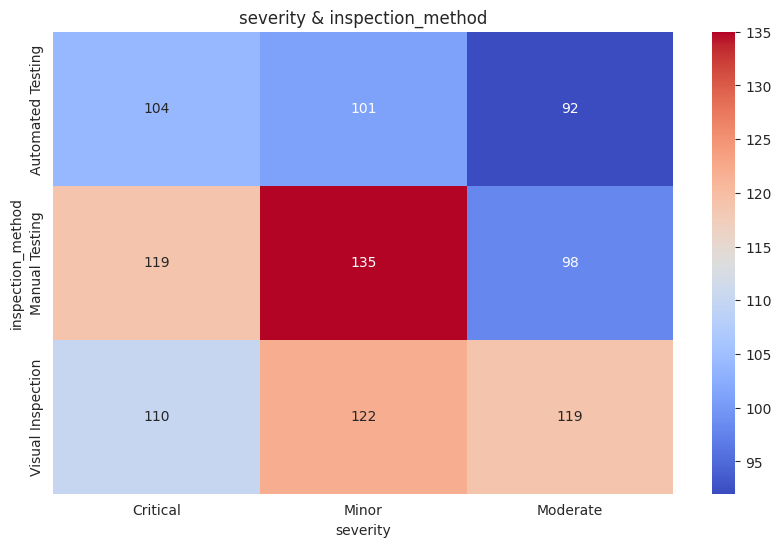

In [ ]:
categ_cols_copy = categ_cols.copy()

for col1 in categ_cols:
    for col2 in categ_cols_copy:
        if col1 != col2:
            tbl = pd.crosstab(df_defect[col2], df_defect[col1])
            plt.figure(figsize=(10,6))
            plt.title(f'{col1} & {col2}')
            sns.heatmap(tbl, annot=True, cmap='coolwarm', fmt='d')
            plt.show()
    categ_cols_copy.remove(col1)

**Key areas**:

- Sructure defects on surface of products is highest and

- Minor structural defects are frequently detected

- Most of structural defects are detected through Visual inspection and Manual testing

- Functional defects are highly detected by Manual testing and visual inspection

- Minor defects are highest defects, especially detected in surface of products while Critical defects is mostly occurred in surface and internal of products.

- Defects on surface of products are highly detected by manual testing

- Manual testing is detected most of defects, the next is visual inspection


###**Calculate Correlation**

In [ ]:
category_count = df_defect.groupby(['defect_type','defect_location','severity','inspection_method'])['repair_cost'].sum().unstack()
category_count

<ipython-input-38-c923d0dc4cc3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_count = df_defect.groupby(['defect_type','defect_location','severity','inspection_method'])['repair_cost'].sum().unstack()


inspection_method                     Automated Testing  Manual Testing  \
defect_type defect_location severity                                      
Cosmetic    Component       Critical            5065.10         6317.62   
                            Minor               5033.12         7604.65   
                            Moderate            6545.01         4867.92   
            Internal        Critical            5949.23         3716.45   
                            Minor               2715.66         8822.51   
                            Moderate            3813.00         7687.11   
            Surface         Critical            5514.93         8265.16   
                            Minor               6384.30         5674.10   
                            Moderate            4449.76         3326.67   
Functional  Component       Critical            7593.20         9441.80   
                            Minor               5184.64         5468.59   
                            Moderate            6805.24         4383.65   
            Internal        Critical            8275.06         8174.14   
                            Minor               3715.22         6832.03   
                            Moderate            2768.20         8083.24   
            Surface         Critical            4706.45         7971.66   
                            Minor               7247.61         7257.65   
                            Moderate            4903.47         8353.34   
Structural  Component       Critical            2988.29         4909.00   
                            Minor               5657.80         8126.90   
                            Moderate            7118.71         6048.24   
            Internal        Critical            6421.75         3764.74   
                            Minor               9004.41         9837.73   
                            Moderate            3655.80         4175.53   
            Surface         Critical            7319.33         9790.41   
                            Minor               5762.41        11500.29   
                            Moderate            4438.18         4777.16   

inspection_method                     Visual Inspection  
defect_type defect_location severity                     
Cosmetic    Component       Critical            5799.37  
                            Minor              10020.56  
                            Moderate            5163.57  
            Internal        Critical            4902.45  
                            Minor               4249.15  
                            Moderate            4531.89  
            Surface         Critical            4645.12  
                            Minor               7122.67  
                            Moderate           10610.64  
Functional  Component       Critical            6012.16  
                            Minor               4702.54  
                            Moderate           10189.50  
            Internal        Critical            6290.79  
                            Minor               8671.25  
                            Moderate            6385.65  
            Surface         Critical            3982.65  
                            Minor               3722.70  
                            Moderate            4783.15  
Structural  Component       Critical            7940.65  
                            Minor               8872.19  
                            Moderate            5837.54  
            Internal        Critical            8053.39  
                            Minor               6303.93  
                            Moderate            5127.02  
            Surface         Critical            4644.35  
                            Minor               8672.36  
                            Moderate            6175.74

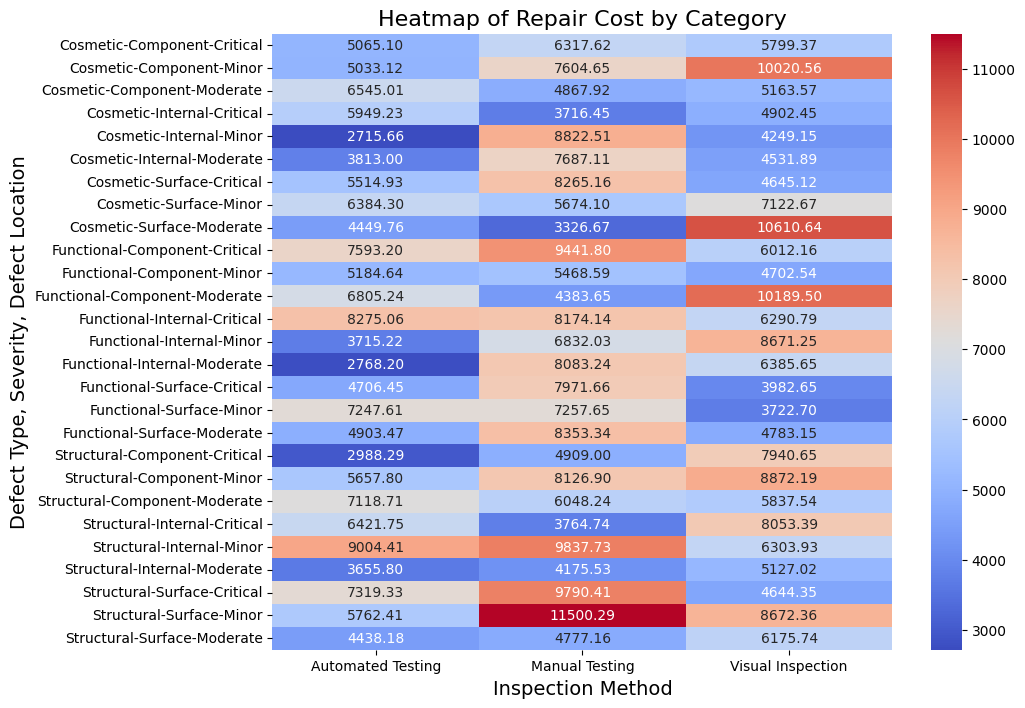

In [ ]:
# prompt: create heatmap with category_count

plt.figure(figsize=(10, 8))
sns.heatmap(category_count, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap of Repair Cost by Category', fontsize=16)
plt.xlabel('Inspection Method', fontsize=14)
plt.ylabel('Defect Type, Severity, Defect Location', fontsize=14)
plt.show()


**Key Insights**

**High-Cost Areas:**

Cosmetic-Component-Minor under Visual Inspection shows a high cost (10020.56).

Functional-Component-Critical under Manual Testing also has a high cost (9441.80).

Structural-Surface-Minor under Manual Testing is notably high (11500.29).

**Low-Cost Areas:**

Cosmetic-Internal-Minor under Automated Testing shows a lower cost (2715.66).

Functional-Internal-Moderate under Automated Testing is relatively low (2768.20).

In [ ]:
# one hot coding for non numeric columns

df_defect_encode = pd.get_dummies(df_defect, columns=['defect_type', 'defect_location', 'severity', 'inspection_method'])
df_defect_encode.head()


,defect_id,product_id,defect_date,repair_cost,month,defect_type_Cosmetic,defect_type_Functional,defect_type_Structural,defect_location_Component,defect_location_Internal,defect_location_Surface,severity_Critical,severity_Minor,severity_Moderate,inspection_method_Automated Testing,inspection_method_Manual Testing,inspection_method_Visual Inspection
0,1,15,2024-06-06,245.47,2024-06,False,False,True,True,False,False,False,True,False,False,False,True
1,2,6,2024-04-26,26.87,2024-04,False,True,False,True,False,False,False,True,False,False,False,True
2,3,84,2024-02-15,835.81,2024-02,False,False,True,False,True,False,False,True,False,True,False,False
3,4,10,2024-03-28,444.47,2024-03,False,True,False,False,True,False,True,False,False,True,False,False
4,5,14,2024-04-26,823.64,2024-04,True,False,False,True,False,False,False,True,False,False,True,False


In [ ]:
df_defect_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   defect_id                            1000 non-null   int64         
 1   product_id                           1000 non-null   int64         
 2   defect_date                          1000 non-null   datetime64[ns]
 3   repair_cost                          1000 non-null   float64       
 4   month                                1000 non-null   object        
 5   defect_type_Cosmetic                 1000 non-null   bool          
 6   defect_type_Functional               1000 non-null   bool          
 7   defect_type_Structural               1000 non-null   bool          
 8   defect_location_Component            1000 non-null   bool          
 9   defect_location_Internal             1000 non-null   bool          
 10  defect_locati

In [ ]:
x

'2024-06'

In [ ]:
# remove object columns for correlated calculation

del df_defect_encode['month']

In [ ]:
df_defect_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   defect_id                            1000 non-null   int64         
 1   product_id                           1000 non-null   int64         
 2   defect_date                          1000 non-null   datetime64[ns]
 3   repair_cost                          1000 non-null   float64       
 4   defect_type_Cosmetic                 1000 non-null   bool          
 5   defect_type_Functional               1000 non-null   bool          
 6   defect_type_Structural               1000 non-null   bool          
 7   defect_location_Component            1000 non-null   bool          
 8   defect_location_Internal             1000 non-null   bool          
 9   defect_location_Surface              1000 non-null   bool          
 10  severity_Crit

In [ ]:
df_defect_encode.corr()

,defect_id,product_id,defect_date,repair_cost,defect_type_Cosmetic,defect_type_Functional,defect_type_Structural,defect_location_Component,defect_location_Internal,defect_location_Surface,severity_Critical,severity_Minor,severity_Moderate,inspection_method_Automated Testing,inspection_method_Manual Testing,inspection_method_Visual Inspection
defect_id,1.000000,-0.001343,-0.027566,0.013103,0.059348,-0.004065,-0.053391,-0.002247,0.014027,-0.011500,-0.025869,0.016489,0.009277,0.023263,-0.040647,0.018403
product_id,-0.001343,1.000000,-0.033840,0.004647,0.024704,0.022100,-0.045806,-0.033149,-0.001358,0.033840,-0.055211,0.010077,0.045856,0.033081,0.042236,-0.073934
defect_date,-0.027566,-0.033840,1.000000,-0.010216,-0.009921,0.015979,-0.006239,-0.004730,-0.002933,0.007504,-0.030488,0.029221,0.000779,0.011992,-0.060021,0.048580
repair_cost,0.013103,0.004647,-0.010216,1.000000,0.014510,-0.001314,-0.012737,0.060513,-0.007555,-0.051973,-0.004285,0.017556,-0.013844,-0.013074,0.046968,-0.034482
defect_type_Cosmetic,0.059348,0.024704,-0.009921,0.014510,1.000000,-0.478894,-0.492861,-0.017239,-0.019418,0.035878,0.018841,-0.020864,0.002431,0.005811,-0.012543,0.006987
defect_type_Functional,-0.004065,0.022100,0.015979,-0.001314,-0.478894,1.000000,-0.527816,0.029231,0.032494,-0.060413,0.004989,-0.036847,0.033141,-0.007781,0.020665,-0.013230
defect_type_Structural,-0.053391,-0.045806,-0.006239,-0.012737,-0.492861,-0.527816,1.000000,-0.012293,-0.013419,0.025166,-0.023174,0.056708,-0.035199,0.002090,-0.008347,0.006352
defect_location_Component,-0.002247,-0.033149,-0.004730,0.060513,-0.017239,0.029231,-0.012293,1.000000,-0.478186,-0.513705,-0.025159,-0.003151,0.028929,-0.003838,-0.030160,0.033854
defect_location_Internal,0.014027,-0.001358,-0.002933,-0.007555,-0.019418,0.032494,-0.013419,-0.478186,1.000000,-0.507870,0.036846,-0.004102,-0.033324,0.021859,0.000036,-0.020963
defect_location_Surface,-0.011500,0.033840,0.007504,-0.051973,0.035878,-0.060413,0.025166,-0.513705,-0.507870,1.000000,-0.011317,0.007097,0.004180,-0.017589,0.029547,-0.012727


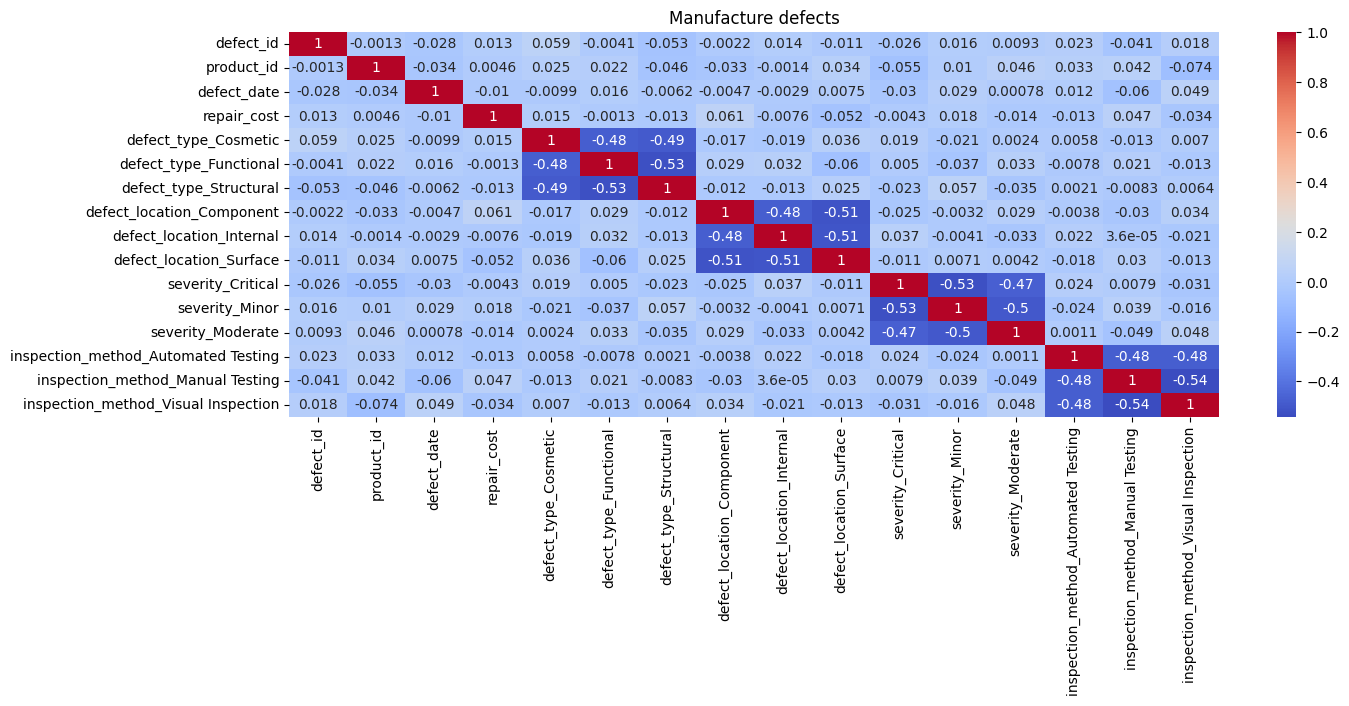

In [ ]:
corr_matrix = df_defect_encode.corr()

plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Manufacture defects')
plt.show()

# **Conclusion**

About the defects:

- Structural defects are the most frequent and tend to increase in frequency, while others are decreasing;
- Defects of critical severity are trending upwards, the rest are trending downwards;
- The surface is the place with the most frequent occurrence of defects, especially structural defects;
- Defects of minor severity are the most frequent.
  
I think we need to draw a the production process and apply quality control processes to find out the root cause of the structure defects in the surface of the products.

The analysis show that the investigation should be started to find what has been causing the increase and decrease in the number of defects in Products focusing on:

(1) defects of critical severity,

(2) defects of the rural type that are in an upward trend, before the other aspects also increase the frequency of defects, and

(3) defects on the surface of the products.

Correlation between variables are very weak, so data model can not apply for this dataset